In [25]:
import random
import numpy as np
from collections import defaultdict
from bisect import bisect_left
import pandas as pd
from matplotlib import pyplot as plt

randomLib = []
cuadradosMedios = []
congruenciaLineal = []

seed = 12082021
np.random.seed(seed)

randomLib = np.random.rand(125)

randomLib

array([0.0213125 , 0.1925147 , 0.65022317, 0.59901792, 0.96318574,
       0.94105618, 0.72789031, 0.0947742 , 0.19688377, 0.77112984,
       0.72658558, 0.93959203, 0.92571122, 0.42733289, 0.07023847,
       0.34217477, 0.52154158, 0.60041226, 0.90333886, 0.76506077,
       0.86892796, 0.21763692, 0.53873561, 0.67958618, 0.84539166,
       0.61548304, 0.38370923, 0.63574691, 0.23378763, 0.41329067,
       0.07071273, 0.31224262, 0.20953384, 0.53652589, 0.57905369,
       0.39814381, 0.59827327, 0.20438962, 0.02074584, 0.25938279,
       0.86849638, 0.39662733, 0.3421929 , 0.14355372, 0.19711259,
       0.5059967 , 0.03546392, 0.29331827, 0.90547185, 0.80765768,
       0.50734945, 0.28777342, 0.61602177, 0.90067799, 0.22150541,
       0.91321866, 0.07154236, 0.92843868, 0.71569544, 0.93907898,
       0.19859609, 0.48317233, 0.96721161, 0.70322813, 0.22804718,
       0.36413519, 0.93205421, 0.98742882, 0.24431537, 0.8584519 ,
       0.44855912, 0.82888944, 0.35179667, 0.75280866, 0.30556

In [26]:
xo = 74731897457
d = 7
iteraciones = 125
xn = xo

for i in range(iteraciones):
  xnn = xn**2
  txnn = str(xnn).zfill(8)
  tam = len(txnn)
  ui = int(txnn[int(tam/2-d/2):int(tam/2+d/2)])
  rn = ui / (int('9'*d)+1)
  cuadradosMedios.append(rn)
  xn = ui

xo = 7
a = 74731897457
b = 37747318974
m = 19
xn = xo

for i in range(iteraciones):
  xnn = (a*xn+b) % m
  ui = xnn/m
  congruenciaLineal.append(ui)
  xn = xnn



In [27]:

def count_intervals(sequence):
    intervals = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    count = defaultdict(int)
    intervals.sort()
    for item in sequence:
        pos = bisect_left(intervals, item)
        if pos == len(intervals):
            count[None] += 1
        else:
            count[intervals[pos]] += 1
    return count

countCuadradosMedios = count_intervals(cuadradosMedios)
countCongruenciaLineal = count_intervals(congruenciaLineal)
countRandomLib = count_intervals(randomLib)


Cuadrados Medios
   Interval  Freq
0       0.5     9
1       0.6    16
2       0.3    11
3       0.1     6
4       0.2    10
5       0.8    16
6       0.7    16
7       1.0    18
8       0.9    10
9       0.4    13


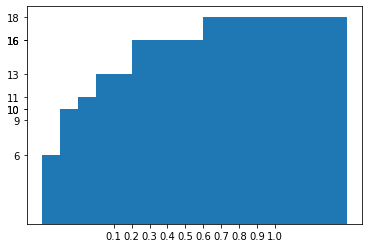

<Figure size 576x576 with 0 Axes>

Congruencia Lineal
   Interval  Freq
0       0.9  28.0
1       1.0  14.0
2       0.8  14.0
3       0.2  14.0
4       0.4  27.0
5       0.0  14.0
6       0.7  14.0
7       0.1   0.0
8       0.3   0.0
9       0.5   0.0


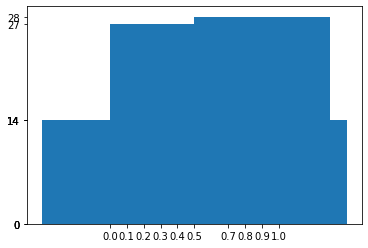

<Figure size 576x576 with 0 Axes>

Libreria de Python
   Interval  Freq
0       0.1    16
1       0.2    11
2       0.7    13
3       0.6    11
4       1.0    18
5       0.8    15
6       0.5     8
7       0.4    10
8       0.9    11
9       0.3    12


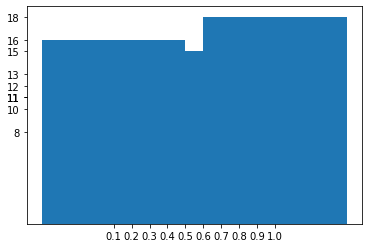

<Figure size 576x576 with 0 Axes>

In [28]:
countCuadradosMediosDF = pd.DataFrame.from_dict(countCuadradosMedios, orient='index')
countCuadradosMediosDF = countCuadradosMediosDF.rename(columns={0: 'Freq'})
countCuadradosMediosDF.index.name = 'Interval'
countCuadradosMediosDF = countCuadradosMediosDF.reset_index()
print('Cuadrados Medios')
print(countCuadradosMediosDF)


plt.bar(countCuadradosMediosDF['Interval'], countCuadradosMediosDF['Freq'], align='center')
plt.gca().set_xticks(countCuadradosMediosDF['Interval'])
plt.gca().set_yticks(countCuadradosMediosDF['Freq'])
plt.figure(figsize=(8,8))
plt.show()

#Congruencia lineal 
countCongruenciaLinealDF = pd.DataFrame.from_dict(countCongruenciaLineal, orient='index')
countCongruenciaLinealDF = countCongruenciaLinealDF.rename(columns={0: 'Freq'})
countCongruenciaLinealDF.index.name = 'Interval'
countCongruenciaLinealDF = countCongruenciaLinealDF.reset_index()
countCongruenciaLinealDF.loc[7] = [0.1, 0] 
countCongruenciaLinealDF.loc[8] = [0.3, 0] 
countCongruenciaLinealDF.loc[9] = [0.5, 0] 
print('Congruencia Lineal')
print(countCongruenciaLinealDF)


plt.bar(countCongruenciaLinealDF['Interval'], countCongruenciaLinealDF['Freq'], align='center')
plt.gca().set_xticks(countCongruenciaLinealDF['Interval'])
plt.gca().set_yticks(countCongruenciaLinealDF['Freq'])
plt.figure(figsize=(8,8))
plt.show()

#Libreria de python
countRandomLibDF = pd.DataFrame.from_dict(countRandomLib, orient='index')
countRandomLibDF = countRandomLibDF.rename(columns={0: 'Freq'})
countRandomLibDF.index.name = 'Interval'
countRandomLibDF = countRandomLibDF.reset_index()
print('Libreria de Python')
print(countRandomLibDF)


plt.bar(countRandomLibDF['Interval'], countRandomLibDF['Freq'], align='center')
plt.gca().set_xticks(countRandomLibDF['Interval'])
plt.gca().set_yticks(countRandomLibDF['Freq'])
plt.figure(figsize=(8,8))
plt.show()


In [29]:
def addChi2Column(df):
  chi2 = []
  for index, row in df.iterrows():
    chi2.append(((row['Freq']-10)*(row['Freq']-10))/10)
  
  df['chi_vals'] = chi2

addChi2Column(countCuadradosMediosDF)
print(countCuadradosMediosDF)
print()
print(countCuadradosMediosDF['chi_vals'].sum())

   Interval  Freq  chi_vals
0       0.5     9       0.1
1       0.6    16       3.6
2       0.3    11       0.1
3       0.1     6       1.6
4       0.2    10       0.0
5       0.8    16       3.6
6       0.7    16       3.6
7       1.0    18       6.4
8       0.9    10       0.0
9       0.4    13       0.9

19.9


In [30]:
addChi2Column(countCongruenciaLinealDF)
print(countCongruenciaLinealDF)
print()
print(countCongruenciaLinealDF['chi_vals'].sum())

   Interval  Freq  chi_vals
0       0.9  28.0      32.4
1       1.0  14.0       1.6
2       0.8  14.0       1.6
3       0.2  14.0       1.6
4       0.4  27.0      28.9
5       0.0  14.0       1.6
6       0.7  14.0       1.6
7       0.1   0.0      10.0
8       0.3   0.0      10.0
9       0.5   0.0      10.0

99.30000000000001


In [31]:
addChi2Column(countRandomLibDF)
print(countRandomLibDF)
print()
print(countRandomLibDF['chi_vals'].sum())

   Interval  Freq  chi_vals
0       0.1    16       3.6
1       0.2    11       0.1
2       0.7    13       0.9
3       0.6    11       0.1
4       1.0    18       6.4
5       0.8    15       2.5
6       0.5     8       0.4
7       0.4    10       0.0
8       0.9    11       0.1
9       0.3    12       0.4

14.5
